In [1]:
#import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import python packages for working with .cool, .bigwig and .gtf files
import pyBigWig
from gtfparse import read_gtf

In [5]:
# import gene annotation in .gft file to extract gene/transcript information
#df_gene0 = read_gtf("[pass to your .gtf file]/mm10.ensGene.gtf")
df_gene0 = read_gtf("../mm10.ensGene.gtf")
df_gene0 = df_gene0[df_gene0['feature']=="transcript"]
df_gene0 = df_gene0[['seqname','start','end','strand','gene_id']]
df_gene0['length'] = df_gene0['end']-df_gene0['start']
df_gene0 = df_gene0.sort_values('length', ascending=False).drop_duplicates('gene_id')
df_gene0 = df_gene0.rename(columns = {'seqname': 'chrom'}, inplace = False)
df_gene0 = df_gene0.sort_values(['chrom','start'])
display(df_gene0)

INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_name', 'exon_number', 'exon_id']


,chrom,start,end,strand,gene_id,length
0,chr1,3073253,3074322,+,ENSMUSG00000102693,1069
2,chr1,3102016,3102125,+,ENSMUSG00000064842,109
10,chr1,3214482,3671498,-,ENSMUSG00000051951,457016
21,chr1,3252757,3253236,+,ENSMUSG00000102851,479
23,chr1,3365731,3368549,-,ENSMUSG00000103377,2818
...,...,...,...,...,...,...
1449890,chrY,90754513,90754821,-,ENSMUSG00000095366,308
1449895,chrY,90784738,90816439,+,ENSMUSG00000096768,31701
1449950,chrY,90837413,90844040,+,ENSMUSG00000099871,6627
1449955,chrY,90838869,90839177,-,ENSMUSG00000096850,308


In [6]:
# select a subset of genes based on size
lmin = 10_000
lmax = 20_000
df_gene = df_gene0[(df_gene0['length']<lmax)&(df_gene0['length']>lmin)]
df_gene = df_gene.reset_index(drop=True)
display(df_gene)

,chrom,start,end,strand,gene_id,length
0,chr1,3647309,3658904,-,ENSMUSG00000102331,11595
1,chr1,4773211,4785739,-,ENSMUSG00000033845,12528
2,chr1,5588493,5606131,+,ENSMUSG00000025905,17638
3,chr1,6429655,6441296,-,ENSMUSG00000103845,11641
4,chr1,10024601,10038127,-,ENSMUSG00000025917,13526
...,...,...,...,...,...,...
4736,chrY,78147088,78157505,-,ENSMUSG00000102111,10417
4737,chrY,78356809,78367279,-,ENSMUSG00000101115,10470
4738,chrY,83537567,83551484,+,ENSMUSG00000100092,13917
4739,chrY,85661766,85672245,-,ENSMUSG00000099341,10479


In [7]:
# compute Intra-gene RNA Pol II (IR) score from PolII ChIP-seq data in BigWig format
#pol2 = pyBigWig.open("[pass to your .bigwig file]/GSM4173524_DMSO-N20-input_rep1.bw")
pol2 = pyBigWig.open("RNAPol2_chip/GSM4173524_DMSO-N20-input_rep1.bw")
l = len(df_gene)
for i in range(l):
    ch = df_gene.chrom[i]
    start = df_gene.start[i]
    end = df_gene.end[i]
    df_gene.loc[i,'ir_score'] = np.mean(pol2.values(ch,start,end))
df_gene.loc[:,'log2_ir_score'] = np.log2(df_gene['ir_score'])

display(df_gene)

,chrom,start,end,strand,gene_id,length,ir_score,log2_ir_score
0,chr1,3647309,3658904,-,ENSMUSG00000102331,11595,0.281066,-1.831019
1,chr1,4773211,4785739,-,ENSMUSG00000033845,12528,8.922731,3.157485
2,chr1,5588493,5606131,+,ENSMUSG00000025905,17638,0.246614,-2.019674
3,chr1,6429655,6441296,-,ENSMUSG00000103845,11641,0.634843,-0.655528
4,chr1,10024601,10038127,-,ENSMUSG00000025917,13526,4.199902,2.070356
...,...,...,...,...,...,...,...,...
4736,chrY,78147088,78157505,-,ENSMUSG00000102111,10417,0.060429,-4.048612
4737,chrY,78356809,78367279,-,ENSMUSG00000101115,10470,0.077301,-3.693364
4738,chrY,83537567,83551484,+,ENSMUSG00000100092,13917,0.066749,-3.905108
4739,chrY,85661766,85672245,-,ENSMUSG00000099341,10479,0.072944,-3.777066


In [8]:
# select genes based on IR scores
IRmin = 1
IRmax = 2
sub_df_gene = df_gene[(df_gene['log2_ir_score']<IRmax)&(df_gene['log2_ir_score']>IRmin)]
sub_df_gene = sub_df_gene.reset_index(drop=True)
display(sub_df_gene)

,chrom,start,end,strand,gene_id,length,ir_score,log2_ir_score
0,chr1,16665210,16678275,+,ENSMUSG00000025940,13065,2.126176,1.088261
1,chr1,34165856,34178271,-,ENSMUSG00000096992,12415,2.811536,1.491358
2,chr1,36511867,36528237,+,ENSMUSG00000001138,16370,3.156129,1.658156
3,chr1,36701784,36714422,-,ENSMUSG00000037351,12638,2.267319,1.180988
4,chr1,37417084,37430103,-,ENSMUSG00000026112,13019,2.554279,1.352916
...,...,...,...,...,...,...,...,...
944,chrX,155323918,155338467,-,ENSMUSG00000025289,14549,2.476163,1.308107
945,chrX,159372178,159389928,+,ENSMUSG00000067194,17750,3.116697,1.640018
946,chrX,160122209,160138413,-,ENSMUSG00000031299,16204,3.505183,1.809490
947,chrX,166440574,166453140,+,ENSMUSG00000079317,12566,3.459540,1.790580


Text(0.5, 1.0, '10<length<20kb\n1<Log2 IR score<2')

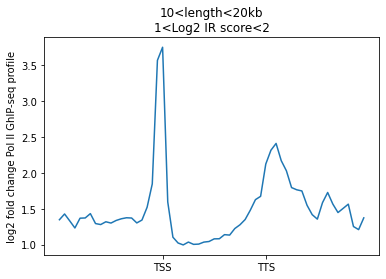

In [14]:
# pileup mtea-gene analysis (PMGA) of intra-gene Pol II ChIP-seq profile
start = sub_df_gene.start[0]-sub_df_gene.length[0]
end = sub_df_gene.end[0]+sub_df_gene.length[0]
ch = sub_df_gene.chrom[0]
snip = np.asarray(pol2.stats(ch,start,end, nBins=60))
stack = snip
l = len(sub_df_gene)
for i in range(1,l):
    start = sub_df_gene.start[i]-sub_df_gene.length[i]
    end = sub_df_gene.end[i]+sub_df_gene.length[i]
    ch = sub_df_gene.chrom[i]
    snip = np.asarray(pol2.stats(ch,start,end, nBins=60))
    stack = np.row_stack((stack,snip))
mask = np.array(sub_df_gene.strand == '-', dtype=bool)
stack[mask, :] = stack[mask, ::-1]
plt.plot(np.arange(60),np.log2(np.nanmean(stack, axis=0)))
ticks_pixels = [20,40]
ticks_labels = ['TSS','TTS']
plt.xticks(ticks_pixels, ticks_labels)
plt.ylabel('log2 fold change Pol II GhIP-seq profile')
plt.title(str(lmin//1000)+'<length<'+str(lmax//1000)+'kb\n'
          +str(IRmin)+'<Log2 IR score<'+str(IRmax))